# Descriptive and Predictive Analytics 
    
Project on Advanced Analytics in Fundraising - “How knowing donors helps in growing donors”

Submitted by (Group 3) - 
 - Paul Cazilhac
 - Prineet Kaur Bhurji
 - Venkat Jayanarasimhan
 - Kiran Tirumale Lakshmana Rao

In [1]:
# Installing the required Packages

import sys
import pandas               as pd
import numpy                as np
import seaborn              as sns
import matplotlib.pyplot    as plt
from pandas                 import DataFrame
from pandas                 import read_csv
from pandas                 import Series
from numpy                  import array
from numpy                  import random
from ieseg                  import detect_outlier
from matplotlib             import pyplot
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the given CSV files and storing them in the required variables

#campaign              =read_csv(".\data\campaigns.csv",sep=";")
#donor                 =read_csv(".\data\donors.csv",sep=";")
#gift                  =read_csv(".\data\gifts.csv",sep=";")
#train_set             =read_csv(".\data\selection campaign 6169.csv",sep=";")
#test_set              =read_csv(".\data\selection campaign 7662 (without gifts).csv",sep=";")

campaign               =read_csv("campaigns.csv",sep=";")
donor                  =read_csv("donors.csv",sep=";")
gift                   =read_csv("gifts.csv",sep=";")
train_set              =read_csv("selection campaign 6169.csv",sep=";")
test_set               =read_csv("selection campaign 7662 (without gifts).csv",sep=";")

# Data PreProcessing (Checking Nominal, Missing & Outliers)

## Exploring the `campaign` table

In [3]:
campaign.head()

,campaignID,date,lettersSent,CostUnit
0,153,13/12/2004,6 873,"0,17 €"
1,154,01/01/2005,7 656,"0,30 €"
2,180,18/01/2005,9 933,"0,20 €"
3,433,29/01/2005,7 448,"0,59 €"
4,476,12/02/2005,6 605,"0,51 €"


In [4]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   campaignID   367 non-null    int64 
 1   date         367 non-null    object
 2   lettersSent  367 non-null    object
 3   CostUnit     367 non-null    object
dtypes: int64(1), object(3)
memory usage: 11.6+ KB


We see that this table has no missing values. However we need to do the following:
1. Convert the `date` column to date type
2. Convert the `lettersSent` column to int type
3. Convert the `CostUnit` to float type

In [5]:
# Converting the date column to the datetime format
campaign['CampaignDate'] = pd.to_datetime(campaign['date'])
campaign = campaign.drop(columns=['date'])

# Converting the lettersSent column to int type
campaign['lettersSent'] = campaign['lettersSent'].str.replace('\u202f', '').astype(int)

# Extracting the number from the CostUnit column and then converting to float
campaign['CostUnitEuro'] = campaign.CostUnit.str.extract('(\d+\,\d+)')
campaign['CostUnitEuro'] = campaign['CostUnitEuro'].str.replace(',', '.').astype(float)

In [6]:
campaign.drop('CostUnit', axis=1, inplace=True)
campaign.head()

,campaignID,lettersSent,CampaignDate,CostUnitEuro
0,153,6873,2004-12-13,0.17
1,154,7656,2005-01-01,0.30
2,180,9933,2005-01-18,0.20
3,433,7448,2005-01-29,0.59
4,476,6605,2005-12-02,0.51


In [7]:
campaign['camp_year'] = pd.DatetimeIndex(campaign['CampaignDate']).year
campaign['camp_month'] = pd.DatetimeIndex(campaign['CampaignDate']).month
campaign['camp_day'] = pd.DatetimeIndex(campaign['CampaignDate']).day

In [8]:
campaign.dtypes

campaignID               int64
lettersSent              int32
CampaignDate    datetime64[ns]
CostUnitEuro           float64
camp_year                int64
camp_month               int64
camp_day                 int64
dtype: object

In [9]:
campaign.head()

,campaignID,lettersSent,CampaignDate,CostUnitEuro,camp_year,camp_month,camp_day
0,153,6873,2004-12-13,0.17,2004,12,13
1,154,7656,2005-01-01,0.30,2005,1,1
2,180,9933,2005-01-18,0.20,2005,1,18
3,433,7448,2005-01-29,0.59,2005,1,29
4,476,6605,2005-12-02,0.51,2005,12,2


In [10]:
# Train campaign details
campaign[campaign['campaignID']==6169]

,campaignID,lettersSent,CampaignDate,CostUnitEuro,camp_year,camp_month,camp_day
335,6169,34888,2018-04-09,0.87,2018,4,9


In [11]:
# Test campaign details
campaign[campaign['campaignID']==7244]

,campaignID,lettersSent,CampaignDate,CostUnitEuro,camp_year,camp_month,camp_day
354,7244,25645,2019-06-18,0.55,2019,6,18


## Exploring `donors` table

In [12]:
donor.head()

,donorID,zipcode,province,region,gender,language,dateOfBirth
0,100001,1861.0,Flemish Brabant,Flanders,F,NL,1967-12-24
1,100002,2260.0,Antwerp,Flanders,M,NL,1952-01-14
2,100003,1780.0,Flemish Brabant,Flanders,M,NL,1986-12-23
3,100004,1020.0,Brussels,Brussels,F,FR,1952-03-29
4,100005,1020.0,Brussels,Brussels,F,FR,1986-06-25


In [13]:
donor.info()          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   donorID      44691 non-null  int64  
 1   zipcode      44689 non-null  float64
 2   province     44691 non-null  object 
 3   region       44691 non-null  object 
 4   gender       44659 non-null  object 
 5   language     44691 non-null  object 
 6   dateOfBirth  44691 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.4+ MB


We have 2 columns having missing values and most of them are of wrong data type:
1. Handling the 2 missing values for `zipcode` and changing the type to int
2. Handling the missing values for `gender` and using LabelEncoder to change it to a boolean type
3. Changing the type of `dateOfBirth` to date type and computing the year from the `dateOfBirth`

#### Handling the `zipcode` column

In [14]:
# Check rows where donor zipcode value is missing
donor[donor['zipcode'].isna()]

,donorID,zipcode,province,region,gender,language,dateOfBirth
5019,105020,NaN,Missing,Missing,M,EN,1966-11-09
22100,122101,NaN,Missing,Missing,F,EN,1975-10-31


In [15]:
# We can't replace the zipcode with zero, as there's already a donor with a zipcode of 0
donor[donor['zipcode']==0]

,donorID,zipcode,province,region,gender,language,dateOfBirth
15231,115232,0.0,Walloon Brabant,Wallonia,M,FR,1932-02-06


In [16]:
# Let's look at all donors who speak 'EN' language, given that both missing zipcode donors are EN speaking
donor[donor['language']=='EN']

,donorID,zipcode,province,region,gender,language,dateOfBirth
533,100534,3080.0,Flemish Brabant,Flanders,M,EN,1982-06-07
5019,105020,NaN,Missing,Missing,M,EN,1966-11-09
6634,106635,3080.0,Flemish Brabant,Flanders,F,EN,1966-01-14
22100,122101,NaN,Missing,Missing,F,EN,1975-10-31
26348,126349,3080.0,Flemish Brabant,Flanders,M,EN,1954-06-23
43374,143375,3090.0,Flemish Brabant,Flanders,F,EN,1962-11-07


In [17]:
# Checking the amounts of donations made by the Donors with missing Zipcode
ziptest=pd.merge(gift, donor, how="inner", on="donorID")
ziptest[ziptest['zipcode'].isna()].groupby('donorID')['amount'].mean()

donorID
105020    146.617800
122101     41.526667
Name: amount, dtype: float64

We can confirm that the donor `105020` is a high paying donor, and hence dropping this row out would be a big mistake

In [18]:
#Replacing the missing zipcode with 3080 as it's the most frequent value where:
#language=EN, region=Flanders & province=Flemish Brabant
donor['zipcode'].fillna(3080,inplace=True)

In [19]:
#Converting the zipcode to string, extracting the number till the '.', and then converting to int
donor['zipcode'] = donor['zipcode'].astype(str)
donor['zipcode'] = donor.zipcode.str.extract('(\d+)')
donor['zipcode'] = donor['zipcode'].astype(int)

#### Converting the `dateOfBirth` column

In [20]:
#Converting the date column to the datetime format
donor['dateOfBirth'] = pd.to_datetime(donor['dateOfBirth'])

#### Dealing with the `gender` column

In [21]:
#Check rows where donor gender value is missing
donor[donor['gender'].isna()].count()

donorID        32
zipcode        32
province       32
region         32
gender          0
language       32
dateOfBirth    32
dtype: int64

In [22]:
gendertest=pd.merge(gift,donor,how="inner", on="donorID")

# If we drop the rows where the gender is unknown, we would loose 172 rows:
gendertest[gendertest['gender'].isna()].count()

donorID        172
campaignID     162
amount         172
date           172
zipcode        172
province       172
region         172
gender           0
language       172
dateOfBirth    172
dtype: int64

In [23]:
# Average amount spent by a donor whose gender is missing
gendertest[gendertest['gender'].isna()].groupby('donorID')['amount'].mean().mean()

23.59823258716365

In [24]:
# Average amount spent by a donor
gendertest.groupby('donorID')['amount'].mean().mean()

128.89888949453876

In [25]:
# Total amount spent by donors whose gender is missing
gendertest[gendertest['gender'].isna()]['amount'].sum()

4248.049999999999

In [26]:
# Total amount spent by all donors
gendertest.groupby('donorID')['amount'].sum().sum()

12454476.887999998

In [27]:
# Percentage of spends by donors whose gender is missing over Total amount spent by all donors
(gendertest[gendertest['gender'].isna()]['amount'].sum()) / gendertest.groupby('donorID')['amount'].sum().sum() * 100

0.03410861843658029

Although the `gender` missing donors are below average, instead of dropping the rows where the gender is unknown, let's use `One-Hot Encoding` on the gender column with the missing values. As having a missing or unknown gender is a frequent possibility:

In [28]:
donor['gender'].fillna('Missing',inplace=True)

#### One-Hot encoding the `gender` columns

In [29]:
genders = pd.get_dummies(donor['gender'])
genders.columns = ['Gender_M', 'Gender_F', 'Gender_Missing']
donor = donor.join(genders)
donor.drop('gender', axis=1, inplace=True)
donor.head()

,donorID,zipcode,province,region,language,dateOfBirth,Gender_M,Gender_F,Gender_Missing
0,100001,1861,Flemish Brabant,Flanders,NL,1967-12-24,1,0,0
1,100002,2260,Antwerp,Flanders,NL,1952-01-14,0,1,0
2,100003,1780,Flemish Brabant,Flanders,NL,1986-12-23,0,1,0
3,100004,1020,Brussels,Brussels,FR,1952-03-29,1,0,0
4,100005,1020,Brussels,Brussels,FR,1986-06-25,1,0,0


#### One-Hot encoding the `language` column

In [30]:
languages = pd.get_dummies(donor['language'])
languages.columns = ['EN', 'FR', 'NL']
donor = donor.join(languages)
donor.drop('language', axis=1, inplace=True)
donor.head()

,donorID,zipcode,province,region,dateOfBirth,Gender_M,Gender_F,Gender_Missing,EN,FR,NL
0,100001,1861,Flemish Brabant,Flanders,1967-12-24,1,0,0,0,0,1
1,100002,2260,Antwerp,Flanders,1952-01-14,0,1,0,0,0,1
2,100003,1780,Flemish Brabant,Flanders,1986-12-23,0,1,0,0,0,1
3,100004,1020,Brussels,Brussels,1952-03-29,1,0,0,0,1,0
4,100005,1020,Brussels,Brussels,1986-06-25,1,0,0,0,1,0


#### Calculating `age` from the `dateOfBirth` column

In [31]:
#Computing the age column
donor['year'] = donor['dateOfBirth'].apply(lambda row: row.year)
donor['age'] = pd.to_datetime('today').year - donor['year']

donor['age_6169'] = pd.to_datetime('2018-04-09').year - donor['year']
#donor['age_7244'] = pd.to_datetime('2019-06-18').year - donor['year']

donor.drop(['year', 'dateOfBirth'], axis=1, inplace=True)
donor.head()

,donorID,zipcode,province,region,Gender_M,Gender_F,Gender_Missing,EN,FR,NL,age,age_6169
0,100001,1861,Flemish Brabant,Flanders,1,0,0,0,0,1,53,51
1,100002,2260,Antwerp,Flanders,0,1,0,0,0,1,68,66
2,100003,1780,Flemish Brabant,Flanders,0,1,0,0,0,1,34,32
3,100004,1020,Brussels,Brussels,1,0,0,0,1,0,68,66
4,100005,1020,Brussels,Brussels,1,0,0,0,1,0,34,32


#### Dealing with `zipcode` vs `province` vs `region`

Previously, we handled the `zipcode` and handled its 2 missing values. Now exploring the `province` and `region`

In [32]:
donor['province'].unique()

array(['Flemish Brabant', 'Antwerp', 'Brussels', 'Walloon Brabant',
       'West Flanders', 'East Flanders', 'Liege', 'Luxembourg', 'Namur',
       'Hainaut', 'Limburg', 'Missing'], dtype=object)

In [33]:
donor['region'].unique()

array(['Flanders', 'Brussels', 'Wallonia', 'Missing'], dtype=object)

While both `province` and `region` have Missing values we shall still consider them to be a better feed for our ML model as the `zipcode` has too many granual entries. And thus wont help much while extracting useful insights from our data. Further, we decidee to choose `province` over `region` as the later has too less variables.

#### One-Hot encoding the `province` columns

In [34]:
provinces = pd.get_dummies(donor['province'])
provinces.columns = ['Flemish Brabant', 'Antwerp', 'Brussels', 'Walloon Brabant','West Flanders', 'East Flanders', 
                     'Liege', 'Luxembourg', 'Namur','Hainaut', 'Limburg', 'Province_Missing']
donor = donor.join(provinces)
donor.drop('province', axis=1, inplace=True)
donor.head()

,donorID,zipcode,region,Gender_M,Gender_F,Gender_Missing,EN,FR,NL,age,...,Brussels,Walloon Brabant,West Flanders,East Flanders,Liege,Luxembourg,Namur,Hainaut,Limburg,Province_Missing
0,100001,1861,Flanders,1,0,0,0,0,1,53,...,0,1,0,0,0,0,0,0,0,0
1,100002,2260,Flanders,0,1,0,0,0,1,68,...,0,0,0,0,0,0,0,0,0,0
2,100003,1780,Flanders,0,1,0,0,0,1,34,...,0,1,0,0,0,0,0,0,0,0
3,100004,1020,Brussels,1,0,0,0,1,0,68,...,0,0,0,0,0,0,0,0,0,0
4,100005,1020,Brussels,1,0,0,0,1,0,34,...,0,0,0,0,0,0,0,0,0,0


In [35]:
donor.drop(['zipcode', 'region'], axis=1, inplace=True)
donor.head()

,donorID,Gender_M,Gender_F,Gender_Missing,EN,FR,NL,age,age_6169,Flemish Brabant,...,Brussels,Walloon Brabant,West Flanders,East Flanders,Liege,Luxembourg,Namur,Hainaut,Limburg,Province_Missing
0,100001,1,0,0,0,0,1,53,51,0,...,0,1,0,0,0,0,0,0,0,0
1,100002,0,1,0,0,0,1,68,66,1,...,0,0,0,0,0,0,0,0,0,0
2,100003,0,1,0,0,0,1,34,32,0,...,0,1,0,0,0,0,0,0,0,0
3,100004,1,0,0,0,1,0,68,66,0,...,0,0,0,0,0,0,0,0,0,0
4,100005,1,0,0,0,1,0,34,32,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
donor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   donorID           44691 non-null  int64
 1   Gender_M          44691 non-null  uint8
 2   Gender_F          44691 non-null  uint8
 3   Gender_Missing    44691 non-null  uint8
 4   EN                44691 non-null  uint8
 5   FR                44691 non-null  uint8
 6   NL                44691 non-null  uint8
 7   age               44691 non-null  int64
 8   age_6169          44691 non-null  int64
 9   Flemish Brabant   44691 non-null  uint8
 10  Antwerp           44691 non-null  uint8
 11  Brussels          44691 non-null  uint8
 12  Walloon Brabant   44691 non-null  uint8
 13  West Flanders     44691 non-null  uint8
 14  East Flanders     44691 non-null  uint8
 15  Liege             44691 non-null  uint8
 16  Luxembourg        44691 non-null  uint8
 17  Namur             44691 non-nul

### Handling the outliers for `age`

In [37]:
# Checking for Outliers 

print(detect_outlier(donor['age']))

[101, 100, 100, 100, 100, 101, 100, 101, 100, 100, 101, 100, 100, 100, 100, 101, 100, 100, 100, 100, 101, 100, 100, 101, 100, 100, 100, 100, 100, 100, 100, 100, 101, 101, 100, 101, 131, 101, 128, 100, 100, 100, 100, 101, 100, 100, 100, 100, 100, 100, 100, 101, 101, 100, 100, 100, 100, 100]


Text(0.5, 0, 'age')

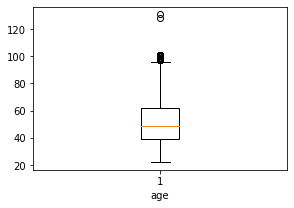

In [38]:
# Visualizing Outliers in Campaign Dataset

donor['age'].value_counts(dropna=False).sort_index(ascending = True)

fig2 = pyplot.figure(figsize=(10,3))
ax1 = fig2.add_subplot(1,2,1)

ax1.boxplot(donor['age'])
ax1.set_xlabel('age')

In [39]:
donor_age_test=pd.merge(gift,donor,how="inner", on="donorID")
donor_age_test.head()

,donorID,campaignID,amount,date,Gender_M,Gender_F,Gender_Missing,EN,FR,NL,...,Brussels,Walloon Brabant,West Flanders,East Flanders,Liege,Luxembourg,Namur,Hainaut,Limburg,Province_Missing
0,100001,NaN,12.39,2004-03-23,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,100001,1577.0,12.39,2007-10-11,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,100001,1634.0,6.69,2007-12-28,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,100001,1778.0,24.79,2008-06-14,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,100001,1808.0,7.44,2008-07-09,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [40]:
# Donor whose age is 131 - average donations of this donor
donor_age_test[donor_age_test['age'] == 131]['amount'].mean()

48.333333333333336

In [41]:
# Donor whose age is 128 - average donations of this donor
donor_age_test[donor_age_test['age'] == 128]['amount'].mean()

29.8125

In [42]:
donor_age_test['age'].mean()

51.63749191984486

#### Assuming that such a high `age` of these 2 donors (age 131 and 128) could be a typo we repalcing them with 31 & 28 respectively

In [43]:
# Checking the donors whose age is 131 and 128
donor[(donor['age'] == 131) | (donor['age'] == 128)]

,donorID,Gender_M,Gender_F,Gender_Missing,EN,FR,NL,age,age_6169,Flemish Brabant,...,Brussels,Walloon Brabant,West Flanders,East Flanders,Liege,Luxembourg,Namur,Hainaut,Limburg,Province_Missing
27008,127009,1,0,0,0,0,1,131,129,0,...,1,0,0,0,0,0,0,0,0,0
27453,127454,1,0,0,0,0,1,128,126,0,...,0,0,0,0,0,0,0,0,0,1


In [44]:
#Replace the donor age 131 & 128 with rectified values
donor['age']=donor['age'].replace([131],31)
donor['age']=donor['age'].replace([128],28)

In [45]:
#Confirming the replacement
donor[(donor['donorID'] == 127009) | (donor['donorID'] == 127454)]

,donorID,Gender_M,Gender_F,Gender_Missing,EN,FR,NL,age,age_6169,Flemish Brabant,...,Brussels,Walloon Brabant,West Flanders,East Flanders,Liege,Luxembourg,Namur,Hainaut,Limburg,Province_Missing
27008,127009,1,0,0,0,0,1,31,129,0,...,1,0,0,0,0,0,0,0,0,0
27453,127454,1,0,0,0,0,1,28,126,0,...,0,0,0,0,0,0,0,0,0,1


In [46]:
donor.head()

,donorID,Gender_M,Gender_F,Gender_Missing,EN,FR,NL,age,age_6169,Flemish Brabant,...,Brussels,Walloon Brabant,West Flanders,East Flanders,Liege,Luxembourg,Namur,Hainaut,Limburg,Province_Missing
0,100001,1,0,0,0,0,1,53,51,0,...,0,1,0,0,0,0,0,0,0,0
1,100002,0,1,0,0,0,1,68,66,1,...,0,0,0,0,0,0,0,0,0,0
2,100003,0,1,0,0,0,1,34,32,0,...,0,1,0,0,0,0,0,0,0,0
3,100004,1,0,0,0,1,0,68,66,0,...,0,0,0,0,0,0,0,0,0,0
4,100005,1,0,0,0,1,0,34,32,0,...,0,0,0,0,0,0,0,0,0,0


## Exploring the `gift` table

In [47]:
gift.head()

,donorID,campaignID,amount,date
0,100001,NaN,12.39,2004-03-23
1,100001,1577.0,12.39,2007-10-11
2,100001,1634.0,6.69,2007-12-28
3,100001,1778.0,24.79,2008-06-14
4,100001,1808.0,7.44,2008-07-09


In [48]:
gift.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216594 entries, 0 to 216593
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   donorID     216594 non-null  int64  
 1   campaignID  200957 non-null  float64
 2   amount      216594 non-null  float64
 3   date        216594 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 6.6+ MB


We have 1 column having missing values and the rest are of wrong data type:
1. Changing the type of `dateOfBirth` to date type
2. Changing the `campaignID` to int, and handling the missing values of this column 

In [49]:
#Changing the type of dateOfBirth column to date type
gift['date'] = pd.to_datetime(gift['date'])

In [50]:
#Handling the .0 in the campaignID column:
gift['campaignID'] = gift['campaignID'].astype(str)
gift['campaignID'] = gift.campaignID.str.extract('(\d+)')

Exploring New Features for Donors in `gift` to get better Insights on their gifting ability

In [51]:
gift_grouped=gift[["donorID","amount","date"]]

#Creating Count of Donation by Donor
count_gift=gift[["donorID","date"]].groupby(by="donorID").count()
count_gift.rename(columns={'date':"NumberOfDonation"},inplace=True )
gift_grouped= pd.merge(gift_grouped,count_gift,how="left",on="donorID")

#Creating Count of Donation by Donor and by Year 
count_by_month=gift[["donorID","date"]]

#Creating year variable 
count_by_month['year']=count_by_month['date'].dt.year 

#Counting number of diferent month by donor
count_of_year=count_by_month.groupby(["donorID", 'year']).count().groupby('donorID').count()
count_of_year.rename(columns={'date':"Number_Of_Year"},inplace=True )
gift_grouped= pd.merge(gift_grouped,count_of_year,how="left",on="donorID")

#Dividing number of donation by number of month
gift_grouped["Donation_Per_Year"]=gift_grouped['NumberOfDonation']/gift_grouped['Number_Of_Year'] 
gift_grouped.drop('Number_Of_Year',axis=1)

#Assigning variable to gift
gift[['Number_Of_Donation','Donation_Per_Year']]= gift_grouped[['NumberOfDonation','Donation_Per_Year']] 
gift

,donorID,campaignID,amount,date,Number_Of_Donation,Donation_Per_Year
0,100001,NaN,12.39,2004-03-23,12,2.0
1,100001,1577,12.39,2007-10-11,12,2.0
2,100001,1634,6.69,2007-12-28,12,2.0
3,100001,1778,24.79,2008-06-14,12,2.0
4,100001,1808,7.44,2008-07-09,12,2.0
...,...,...,...,...,...,...
216589,265584,6169,300.00,2018-09-23,1,1.0
216590,281770,6169,30.00,2018-09-08,1,1.0
216591,317880,6169,157.50,2018-09-12,1,1.0
216592,480980,6169,36.00,2018-09-12,1,1.0


#### Dealing with the missing values of `campaignID`

In [52]:
gift['gift_year'] = pd.DatetimeIndex(gift['date']).year
gift['gift_month'] = pd.DatetimeIndex(gift['date']).month
gift['gift_day'] = pd.DatetimeIndex(gift['date']).day

In [53]:
gift = gift.sort_values(['gift_year', 'gift_month', 'gift_day'])
gift

,donorID,campaignID,amount,date,Number_Of_Donation,Donation_Per_Year,gift_year,gift_month,gift_day
27754,103039,NaN,24.79,2000-06-05,2,1.000000,2000,6,5
56616,106414,NaN,24.79,2000-06-05,14,1.555556,2000,6,5
24168,102754,NaN,49.58,2000-06-06,33,2.357143,2000,6,6
32735,103525,NaN,24.79,2000-06-06,11,2.200000,2000,6,6
23099,102674,NaN,12.39,2000-06-10,15,2.500000,2000,6,10
...,...,...,...,...,...,...,...,...,...
43707,104794,7536,60.00,2020-01-04,5,1.000000,2020,1,4
84816,110294,7536,75.00,2020-01-04,27,2.250000,2020,1,4
138107,120129,7536,40.00,2020-01-04,5,1.250000,2020,1,4
166913,126520,7536,50.00,2020-01-04,28,2.545455,2020,1,4


In [54]:
gift.sort_values('donorID')

,donorID,campaignID,amount,date,Number_Of_Donation,Donation_Per_Year,gift_year,gift_month,gift_day
5,100001,1933,24.79,2008-12-01,12,2.0,2008,12,1
4,100001,1808,7.44,2008-07-09,12,2.0,2008,7,9
2,100001,1634,6.69,2007-12-28,12,2.0,2007,12,28
10,100001,2714,10.00,2011-06-02,12,2.0,2011,6,2
3,100001,1778,24.79,2008-06-14,12,2.0,2008,6,14
...,...,...,...,...,...,...,...,...,...
216589,265584,6169,300.00,2018-09-23,1,1.0,2018,9,23
216590,281770,6169,30.00,2018-09-08,1,1.0,2018,9,8
216591,317880,6169,157.50,2018-09-12,1,1.0,2018,9,12
216592,480980,6169,36.00,2018-09-12,1,1.0,2018,9,12


In [55]:
gift_extra = gift[['donorID', 'Number_Of_Donation', 'Donation_Per_Year' ]].groupby('donorID').mean()
gift_extra.reset_index(level=0, inplace=True)
gift_extra.head()

,donorID,Number_Of_Donation,Donation_Per_Year
0,100001,12,2.000000
1,100002,1,1.000000
2,100003,12,4.000000
3,100004,26,3.714286
4,100005,5,1.250000


In [56]:
donor = pd.merge(donor, gift_extra, how='inner', on='donorID')
donor.head()

,donorID,Gender_M,Gender_F,Gender_Missing,EN,FR,NL,age,age_6169,Flemish Brabant,...,West Flanders,East Flanders,Liege,Luxembourg,Namur,Hainaut,Limburg,Province_Missing,Number_Of_Donation,Donation_Per_Year
0,100001,1,0,0,0,0,1,53,51,0,...,0,0,0,0,0,0,0,0,12,2.000000
1,100002,0,1,0,0,0,1,68,66,1,...,0,0,0,0,0,0,0,0,1,1.000000
2,100003,0,1,0,0,0,1,34,32,0,...,0,0,0,0,0,0,0,0,12,4.000000
3,100004,1,0,0,0,1,0,68,66,0,...,0,0,0,0,0,0,0,0,26,3.714286
4,100005,1,0,0,0,1,0,34,32,0,...,0,0,0,0,0,0,0,0,5,1.250000


In [57]:
#Converting the 'campaignID' column to float instead of object
gift['campaignID'] = gift['campaignID'].astype(float)

#### Replacing all missing value of `campaignID` between same `campaignID`:

In [58]:
for row_index in range(len(gift.index)):
    campaignID = gift['campaignID'].iloc[row_index]
    if not np.isnan(campaignID):
        continue
    prev_campaignID = gift['campaignID'].iloc[row_index-1]
    next_row_index = row_index + 1
    next_campaignID = gift['campaignID'].iloc[next_row_index]
    while np.isnan(next_campaignID):
        next_row_index += 1
        next_campaignID = gift['campaignID'].iloc[next_row_index]
    
    print(prev_campaignID, next_campaignID)
    if prev_campaignID == next_campaignID:
        gift['campaignID'].iloc[row_index] = prev_campaignID
        print('filled')
    else:
        print("no match")

7536.0 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0

nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no

nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no

nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no

nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no

nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no match
nan 153.0
no

filled
606.0 606.0
filled
606.0 606.0
filled
606.0 606.0
filled
606.0 606.0
filled
606.0 606.0
filled
606.0 606.0
filled
606.0 606.0
filled
606.0 606.0
filled
606.0 606.0
filled
606.0 606.0
filled
606.0 606.0
filled
606.0 606.0
filled
606.0 606.0
filled
606.0 606.0
filled
606.0 606.0
filled
606.0 606.0
filled
606.0 606.0
filled
606.0 606.0
filled
606.0 606.0
filled
606.0 606.0
filled
606.0 606.0
filled
606.0 606.0
filled
606.0 606.0
filled
606.0 627.0
no match
nan 627.0
no match
nan 627.0
no match
nan 627.0
no match
nan 627.0
no match
627.0 627.0
filled
627.0 627.0
filled
627.0 663.0
no match
nan 663.0
no match
nan 663.0
no match
nan 663.0
no match
nan 663.0
no match
nan 663.0
no match
nan 663.0
no match
nan 663.0
no match
nan 663.0
no match
nan 663.0
no match
nan 663.0
no match
nan 663.0
no match
nan 663.0
no match
nan 663.0
no match
nan 663.0
no match
nan 663.0
no match
nan 663.0
no match
nan 663.0
no match
663.0 663.0
filled
663.0 663.0
filled
663.0 663.0
filled
663.0 663.0
filled
6

930.0 930.0
filled
954.0 954.0
filled
954.0 930.0
no match
954.0 930.0
no match
954.0 954.0
filled
954.0 930.0
no match
930.0 930.0
filled
954.0 930.0
no match
954.0 954.0
filled
954.0 954.0
filled
954.0 954.0
filled
954.0 954.0
filled
954.0 954.0
filled
954.0 954.0
filled
954.0 954.0
filled
954.0 954.0
filled
954.0 954.0
filled
954.0 954.0
filled
954.0 954.0
filled
954.0 954.0
filled
954.0 954.0
filled
954.0 954.0
filled
954.0 954.0
filled
954.0 954.0
filled
954.0 954.0
filled
954.0 954.0
filled
954.0 954.0
filled
954.0 954.0
filled
954.0 954.0
filled
954.0 954.0
filled
954.0 954.0
filled
954.0 954.0
filled
954.0 954.0
filled
954.0 954.0
filled
954.0 954.0
filled
954.0 954.0
filled
954.0 954.0
filled
954.0 954.0
filled
954.0 954.0
filled
954.0 954.0
filled
954.0 954.0
filled
954.0 954.0
filled
954.0 954.0
filled
954.0 954.0
filled
954.0 954.0
filled
954.0 954.0
filled
954.0 954.0
filled
954.0 954.0
filled
954.0 954.0
filled
954.0 954.0
filled
954.0 954.0
filled
954.0 954.0
filled
954.

filled
1028.0 1028.0
filled
1028.0 1028.0
filled
1028.0 1028.0
filled
1028.0 1028.0
filled
1028.0 1028.0
filled
1028.0 1028.0
filled
1028.0 1028.0
filled
1028.0 1028.0
filled
1028.0 1028.0
filled
1028.0 1028.0
filled
1028.0 1028.0
filled
1028.0 1028.0
filled
1028.0 1028.0
filled
1028.0 1028.0
filled
1028.0 1028.0
filled
1028.0 1028.0
filled
1028.0 1028.0
filled
1028.0 1028.0
filled
1028.0 1028.0
filled
1028.0 1028.0
filled
1028.0 1028.0
filled
1028.0 1028.0
filled
1028.0 1028.0
filled
1028.0 1028.0
filled
1028.0 1028.0
filled
1028.0 1028.0
filled
1028.0 1028.0
filled
1028.0 1028.0
filled
1028.0 1028.0
filled
1028.0 1028.0
filled
1028.0 1028.0
filled
1028.0 1028.0
filled
1028.0 1028.0
filled
1028.0 1028.0
filled
1028.0 1028.0
filled
1028.0 1028.0
filled
1028.0 1028.0
filled
1028.0 1028.0
filled
1028.0 1028.0
filled
1028.0 1028.0
filled
1028.0 1028.0
filled
1028.0 1028.0
filled
1028.0 1028.0
filled
1028.0 1028.0
filled
1028.0 1028.0
filled
1028.0 1028.0
filled
1028.0 1028.0
filled
1028.0

filled
1148.0 1148.0
filled
1148.0 1149.0
no match
1148.0 1148.0
filled
1148.0 1148.0
filled
1148.0 1148.0
filled
1148.0 1148.0
filled
1148.0 1149.0
no match
1148.0 1148.0
filled
1149.0 1149.0
filled
1149.0 1149.0
filled
1149.0 1149.0
filled
1149.0 1149.0
filled
1148.0 1148.0
filled
1148.0 1148.0
filled
1148.0 1149.0
no match
1149.0 1149.0
filled
1149.0 1149.0
filled
1148.0 1148.0
filled
1149.0 1148.0
no match
1149.0 1149.0
filled
1149.0 1149.0
filled
1149.0 1148.0
no match
1149.0 1149.0
filled
1148.0 1149.0
no match
1148.0 1148.0
filled
1149.0 1149.0
filled
1149.0 1149.0
filled
1149.0 1149.0
filled
1149.0 1149.0
filled
1149.0 1149.0
filled
1149.0 1149.0
filled
1149.0 1149.0
filled
1149.0 1149.0
filled
1149.0 1149.0
filled
1149.0 1149.0
filled
1149.0 1149.0
filled
1149.0 1149.0
filled
1149.0 1149.0
filled
1149.0 1149.0
filled
1149.0 1149.0
filled
1149.0 1149.0
filled
1149.0 1149.0
filled
1149.0 1149.0
filled
1149.0 1153.0
no match
nan 1153.0
no match
nan 1153.0
no match
nan 1153.0
no m

1235.0 1235.0
filled
1235.0 1235.0
filled
1235.0 1235.0
filled
1235.0 1235.0
filled
1235.0 1235.0
filled
1235.0 1235.0
filled
1235.0 1235.0
filled
1235.0 1235.0
filled
1235.0 1235.0
filled
1235.0 1235.0
filled
1235.0 1235.0
filled
1235.0 1235.0
filled
1235.0 1235.0
filled
1235.0 1235.0
filled
1235.0 1235.0
filled
1235.0 1235.0
filled
1235.0 1235.0
filled
1235.0 1235.0
filled
1235.0 1235.0
filled
1235.0 1235.0
filled
1235.0 1245.0
no match
1245.0 1235.0
no match
1245.0 1245.0
filled
1245.0 1245.0
filled
1245.0 1245.0
filled
1245.0 1245.0
filled
1245.0 1235.0
no match
nan 1235.0
no match
1245.0 1245.0
filled
1245.0 1245.0
filled
1245.0 1245.0
filled
1245.0 1245.0
filled
1245.0 1245.0
filled
1245.0 1235.0
no match
nan 1235.0
no match
nan 1235.0
no match
nan 1235.0
no match
1245.0 1245.0
filled
1245.0 1245.0
filled
1245.0 1245.0
filled
1245.0 1245.0
filled
1245.0 1245.0
filled
1245.0 1245.0
filled
1245.0 1245.0
filled
1245.0 1235.0
no match
1245.0 1245.0
filled
1245.0 1235.0
no match
1235.

filled
1343.0 1343.0
filled
1343.0 1343.0
filled
1343.0 1343.0
filled
1343.0 1343.0
filled
1343.0 1343.0
filled
1374.0 1374.0
filled
1374.0 1374.0
filled
1374.0 1374.0
filled
1374.0 1374.0
filled
1374.0 1374.0
filled
1374.0 1374.0
filled
1374.0 1374.0
filled
1374.0 1374.0
filled
1374.0 1374.0
filled
1374.0 1374.0
filled
1374.0 1374.0
filled
1374.0 1374.0
filled
1374.0 1374.0
filled
1374.0 1374.0
filled
1374.0 1374.0
filled
1374.0 1374.0
filled
1374.0 1374.0
filled
1374.0 1374.0
filled
1374.0 1374.0
filled
1374.0 1374.0
filled
1374.0 1374.0
filled
1374.0 1374.0
filled
1374.0 1374.0
filled
1374.0 1374.0
filled
1374.0 1374.0
filled
1374.0 1374.0
filled
1374.0 1374.0
filled
1374.0 1374.0
filled
1374.0 1374.0
filled
1374.0 1374.0
filled
1374.0 1374.0
filled
1374.0 1374.0
filled
1374.0 1374.0
filled
1374.0 1374.0
filled
1374.0 1374.0
filled
1374.0 1374.0
filled
1374.0 1374.0
filled
1374.0 1374.0
filled
1374.0 1374.0
filled
1374.0 1374.0
filled
1374.0 1374.0
filled
1374.0 1374.0
filled
1374.0

filled
1490.0 1490.0
filled
1513.0 1513.0
filled
1513.0 1513.0
filled
1513.0 1513.0
filled
1513.0 1513.0
filled
1513.0 1513.0
filled
1513.0 1513.0
filled
1513.0 1513.0
filled
1513.0 1513.0
filled
1513.0 1513.0
filled
1513.0 1513.0
filled
1513.0 1513.0
filled
1513.0 1513.0
filled
1513.0 1513.0
filled
1513.0 1513.0
filled
1513.0 1513.0
filled
1513.0 1513.0
filled
1513.0 1513.0
filled
1513.0 1513.0
filled
1513.0 1513.0
filled
1513.0 1513.0
filled
1513.0 1513.0
filled
1513.0 1513.0
filled
1513.0 1513.0
filled
1513.0 1513.0
filled
1513.0 1513.0
filled
1513.0 1513.0
filled
1513.0 1513.0
filled
1513.0 1513.0
filled
1513.0 1513.0
filled
1513.0 1513.0
filled
1513.0 1513.0
filled
1513.0 1513.0
filled
1513.0 1513.0
filled
1513.0 1513.0
filled
1513.0 1513.0
filled
1513.0 1513.0
filled
1513.0 1513.0
filled
1513.0 1513.0
filled
1513.0 1513.0
filled
1513.0 1513.0
filled
1513.0 1513.0
filled
1529.0 1529.0
filled
1529.0 1529.0
filled
1529.0 1529.0
filled
1529.0 1529.0
filled
1529.0 1529.0
filled
1529.0

1634.0 1634.0
filled
1634.0 1634.0
filled
1634.0 1634.0
filled
1634.0 1634.0
filled
1634.0 1634.0
filled
1634.0 1634.0
filled
1634.0 1634.0
filled
1634.0 1634.0
filled
1634.0 1634.0
filled
1634.0 1634.0
filled
1634.0 1634.0
filled
1634.0 1634.0
filled
1634.0 1634.0
filled
1634.0 1634.0
filled
1634.0 1634.0
filled
1634.0 1634.0
filled
1634.0 1634.0
filled
1634.0 1634.0
filled
1634.0 1634.0
filled
1634.0 1636.0
no match
nan 1636.0
no match
nan 1636.0
no match
1636.0 1636.0
filled
1636.0 1636.0
filled
1636.0 1636.0
filled
1636.0 1636.0
filled
1636.0 1636.0
filled
1636.0 1636.0
filled
1636.0 1636.0
filled
1636.0 1636.0
filled
1636.0 1636.0
filled
1636.0 1636.0
filled
1636.0 1636.0
filled
1636.0 1636.0
filled
1636.0 1636.0
filled
1636.0 1636.0
filled
1636.0 1636.0
filled
1636.0 1636.0
filled
1636.0 1636.0
filled
1636.0 1636.0
filled
1636.0 1636.0
filled
1636.0 1636.0
filled
1636.0 1636.0
filled
1636.0 1636.0
filled
1636.0 1636.0
filled
1636.0 1636.0
filled
1636.0 1636.0
filled
1636.0 1636.0

filled
1755.0 1755.0
filled
1755.0 1755.0
filled
1755.0 1755.0
filled
1755.0 1755.0
filled
1755.0 1755.0
filled
1755.0 1755.0
filled
1755.0 1755.0
filled
1755.0 1755.0
filled
1755.0 1755.0
filled
1755.0 1755.0
filled
1755.0 1755.0
filled
1755.0 1755.0
filled
1755.0 1755.0
filled
1755.0 1755.0
filled
1755.0 1755.0
filled
1755.0 1755.0
filled
1755.0 1755.0
filled
1755.0 1755.0
filled
1755.0 1755.0
filled
1755.0 1755.0
filled
1755.0 1755.0
filled
1755.0 1755.0
filled
1755.0 1755.0
filled
1755.0 1755.0
filled
1755.0 1755.0
filled
1755.0 1755.0
filled
1755.0 1755.0
filled
1755.0 1755.0
filled
1755.0 1755.0
filled
1755.0 1755.0
filled
1755.0 1755.0
filled
1755.0 1755.0
filled
1755.0 1755.0
filled
1755.0 1755.0
filled
1755.0 1755.0
filled
1755.0 1755.0
filled
1755.0 1755.0
filled
1755.0 1755.0
filled
1755.0 1755.0
filled
1755.0 1755.0
filled
1755.0 1755.0
filled
1755.0 1755.0
filled
1755.0 1755.0
filled
1755.0 1755.0
filled
1755.0 1755.0
filled
1755.0 1755.0
filled
1755.0 1755.0
filled
1755.0

filled
1844.0 1844.0
filled
1844.0 1844.0
filled
1844.0 1844.0
filled
1844.0 1844.0
filled
1844.0 1844.0
filled
1844.0 1844.0
filled
1844.0 1844.0
filled
1844.0 1844.0
filled
1851.0 1844.0
no match
1844.0 1844.0
filled
1844.0 1844.0
filled
1844.0 1844.0
filled
1844.0 1861.0
no match
nan 1861.0
no match
nan 1861.0
no match
nan 1861.0
no match
nan 1861.0
no match
nan 1861.0
no match
nan 1861.0
no match
nan 1861.0
no match
nan 1861.0
no match
nan 1861.0
no match
nan 1861.0
no match
nan 1861.0
no match
nan 1861.0
no match
nan 1861.0
no match
nan 1861.0
no match
nan 1861.0
no match
nan 1861.0
no match
nan 1861.0
no match
nan 1861.0
no match
nan 1861.0
no match
nan 1861.0
no match
nan 1861.0
no match
nan 1861.0
no match
nan 1861.0
no match
1861.0 1861.0
filled
1861.0 1861.0
filled
1861.0 1861.0
filled
1861.0 1861.0
filled
1861.0 1861.0
filled
1861.0 1861.0
filled
1861.0 1861.0
filled
1861.0 1861.0
filled
1861.0 1861.0
filled
1861.0 1861.0
filled
1861.0 1861.0
filled
1861.0 1861.0
filled
1861

1933.0 1949.0
no match
1933.0 1933.0
filled
1949.0 1949.0
filled
1949.0 1949.0
filled
1949.0 1949.0
filled
1949.0 1949.0
filled
1949.0 1949.0
filled
1949.0 1949.0
filled
1949.0 1949.0
filled
1949.0 1949.0
filled
1949.0 1949.0
filled
1949.0 1949.0
filled
1949.0 1949.0
filled
1949.0 1949.0
filled
1949.0 1949.0
filled
1949.0 1949.0
filled
1949.0 1949.0
filled
1949.0 1949.0
filled
1949.0 1949.0
filled
1949.0 1962.0
no match
1949.0 1949.0
filled
1962.0 1962.0
filled
1962.0 1949.0
no match
1962.0 1962.0
filled
1962.0 1962.0
filled
1962.0 1962.0
filled
1962.0 1962.0
filled
1962.0 1962.0
filled
1962.0 1962.0
filled
1962.0 1962.0
filled
1962.0 1962.0
filled
1962.0 1962.0
filled
1962.0 1962.0
filled
1962.0 1962.0
filled
1962.0 1962.0
filled
1962.0 1962.0
filled
1962.0 1962.0
filled
1962.0 1962.0
filled
1962.0 1962.0
filled
1962.0 1962.0
filled
1962.0 1962.0
filled
1962.0 1962.0
filled
1962.0 1962.0
filled
1962.0 1962.0
filled
1962.0 1962.0
filled
1962.0 1962.0
filled
1962.0 1962.0
filled
1962.0 

filled
2059.0 2059.0
filled
2059.0 2059.0
filled
2059.0 2059.0
filled
2059.0 2059.0
filled
2059.0 2059.0
filled
2059.0 2059.0
filled
2059.0 2059.0
filled
2059.0 2059.0
filled
2059.0 2059.0
filled
2059.0 2059.0
filled
2059.0 2059.0
filled
2059.0 2059.0
filled
2059.0 2059.0
filled
2059.0 2059.0
filled
2059.0 2059.0
filled
2059.0 2059.0
filled
2059.0 2059.0
filled
2059.0 2059.0
filled
2059.0 2059.0
filled
2059.0 2059.0
filled
2059.0 2059.0
filled
2059.0 2059.0
filled
2059.0 2059.0
filled
2059.0 2059.0
filled
2059.0 2059.0
filled
2059.0 2059.0
filled
2059.0 2059.0
filled
2059.0 2059.0
filled
2059.0 2059.0
filled
2059.0 2059.0
filled
2090.0 2059.0
no match
nan 2059.0
no match
2059.0 2090.0
no match
nan 2090.0
no match
2059.0 2059.0
filled
2090.0 2059.0
no match
2059.0 2090.0
no match
2059.0 2059.0
filled
2059.0 2059.0
filled
2059.0 2059.0
filled
2090.0 2090.0
filled
2090.0 2059.0
no match
nan 2059.0
no match
2059.0 2059.0
filled
2090.0 2059.0
no match
2059.0 2059.0
filled
2090.0 2059.0
no m

2094.0 2105.0
no match
2094.0 2105.0
no match
2105.0 2105.0
filled
2105.0 2105.0
filled
2105.0 2105.0
filled
2105.0 2105.0
filled
2105.0 2105.0
filled
2105.0 2105.0
filled
2105.0 2105.0
filled
2105.0 2105.0
filled
2105.0 2105.0
filled
2105.0 2105.0
filled
2105.0 2105.0
filled
2105.0 2105.0
filled
2105.0 2105.0
filled
2105.0 2123.0
no match
2105.0 2123.0
no match
2123.0 2105.0
no match
2123.0 2105.0
no match
2105.0 2105.0
filled
2123.0 2123.0
filled
2105.0 2105.0
filled
2105.0 2123.0
no match
2123.0 2105.0
no match
2123.0 2123.0
filled
2123.0 2123.0
filled
2123.0 2123.0
filled
2123.0 2123.0
filled
2123.0 2123.0
filled
2123.0 2123.0
filled
2123.0 2123.0
filled
2123.0 2123.0
filled
2123.0 2123.0
filled
2123.0 2123.0
filled
2129.0 2129.0
filled
2123.0 2129.0
no match
2123.0 2123.0
filled
2123.0 2123.0
filled
2123.0 2123.0
filled
2123.0 2129.0
no match
2123.0 2129.0
no match
2123.0 2123.0
filled
2123.0 2129.0
no match
2123.0 2129.0
no match
2123.0 2129.0
no match
nan 2129.0
no match
2129.0 

filled
2225.0 2225.0
filled
2225.0 2225.0
filled
2225.0 2225.0
filled
2225.0 2225.0
filled
2225.0 2225.0
filled
2225.0 2225.0
filled
2225.0 2225.0
filled
2225.0 2225.0
filled
2225.0 2225.0
filled
2225.0 2225.0
filled
2231.0 2225.0
no match
2225.0 2225.0
filled
2225.0 2225.0
filled
2231.0 2225.0
no match
nan 2225.0
no match
2225.0 2225.0
filled
2231.0 2225.0
no match
2225.0 2231.0
no match
2225.0 2231.0
no match
nan 2231.0
no match
2231.0 2225.0
no match
2231.0 2225.0
no match
2231.0 2225.0
no match
2231.0 2225.0
no match
2231.0 2231.0
filled
2231.0 2231.0
filled
2231.0 2225.0
no match
2231.0 2225.0
no match
2231.0 2231.0
filled
2231.0 2231.0
filled
2231.0 2231.0
filled
2231.0 2231.0
filled
2231.0 2231.0
filled
2231.0 2231.0
filled
2232.0 2231.0
no match
nan 2231.0
no match
2231.0 2231.0
filled
2231.0 2231.0
filled
2231.0 2231.0
filled
2231.0 2231.0
filled
2231.0 2232.0
no match
2231.0 2231.0
filled
2231.0 2231.0
filled
2231.0 2231.0
filled
2231.0 2232.0
no match
2231.0 2232.0
no match


filled
2360.0 2360.0
filled
2360.0 2360.0
filled
2360.0 2360.0
filled
2360.0 2360.0
filled
2360.0 2360.0
filled
2360.0 2360.0
filled
2360.0 2360.0
filled
2360.0 2360.0
filled
2360.0 2360.0
filled
2360.0 2360.0
filled
2360.0 2360.0
filled
2360.0 2360.0
filled
2360.0 2360.0
filled
2360.0 2360.0
filled
2360.0 2360.0
filled
2360.0 2360.0
filled
2360.0 2360.0
filled
2360.0 2360.0
filled
2360.0 2360.0
filled
2360.0 2360.0
filled
2360.0 2360.0
filled
2360.0 2360.0
filled
2360.0 2360.0
filled
2360.0 2360.0
filled
2360.0 2360.0
filled
2360.0 2360.0
filled
2360.0 2360.0
filled
2360.0 2360.0
filled
2360.0 2360.0
filled
2360.0 2360.0
filled
2389.0 2389.0
filled
2360.0 2389.0
no match
2360.0 2360.0
filled
2389.0 2389.0
filled
2360.0 2360.0
filled
2360.0 2389.0
no match
2389.0 2360.0
no match
2360.0 2389.0
no match
2360.0 2389.0
no match
2360.0 2389.0
no match
2389.0 2389.0
filled
2389.0 2389.0
filled
2360.0 2360.0
filled
2360.0 2389.0
no match
2389.0 2360.0
no match
2360.0 2360.0
filled
2389.0 2389

filled
2416.0 2416.0
filled
2416.0 2416.0
filled
2416.0 2416.0
filled
2416.0 2416.0
filled
2416.0 2416.0
filled
2416.0 2416.0
filled
2416.0 2416.0
filled
2416.0 2416.0
filled
2416.0 2416.0
filled
2416.0 2416.0
filled
2416.0 2416.0
filled
2416.0 2416.0
filled
2416.0 2416.0
filled
2416.0 2416.0
filled
2416.0 2416.0
filled
2416.0 2416.0
filled
2416.0 2416.0
filled
2416.0 2416.0
filled
2416.0 2416.0
filled
2416.0 2416.0
filled
2416.0 2416.0
filled
2416.0 2416.0
filled
2416.0 2416.0
filled
2416.0 2416.0
filled
2416.0 2416.0
filled
2416.0 2416.0
filled
2416.0 2416.0
filled
2416.0 2416.0
filled
2416.0 2416.0
filled
2417.0 2417.0
filled
2417.0 2417.0
filled
2417.0 2417.0
filled
2417.0 2417.0
filled
2417.0 2417.0
filled
2417.0 2417.0
filled
2417.0 2417.0
filled
2417.0 2417.0
filled
2417.0 2417.0
filled
2417.0 2417.0
filled
2417.0 2417.0
filled
2417.0 2417.0
filled
2417.0 2417.0
filled
2417.0 2417.0
filled
2417.0 2417.0
filled
2417.0 2417.0
filled
2417.0 2417.0
filled
2417.0 2417.0
filled
2417.0

filled
2550.0 2550.0
filled
2550.0 2550.0
filled
2550.0 2550.0
filled
2550.0 2550.0
filled
2550.0 2550.0
filled
2550.0 2550.0
filled
2550.0 2550.0
filled
2550.0 2550.0
filled
2550.0 2550.0
filled
2550.0 2550.0
filled
2550.0 2550.0
filled
2550.0 2550.0
filled
2550.0 2550.0
filled
2550.0 2550.0
filled
2550.0 2550.0
filled
2550.0 2550.0
filled
2550.0 2550.0
filled
2550.0 2550.0
filled
2550.0 2550.0
filled
2550.0 2550.0
filled
2550.0 2550.0
filled
2550.0 2550.0
filled
2550.0 2550.0
filled
2550.0 2550.0
filled
2550.0 2550.0
filled
2550.0 2550.0
filled
2550.0 2550.0
filled
2550.0 2550.0
filled
2550.0 2550.0
filled
2550.0 2550.0
filled
2550.0 2550.0
filled
2550.0 2550.0
filled
2550.0 2550.0
filled
2550.0 2550.0
filled
2550.0 2550.0
filled
2550.0 2550.0
filled
2550.0 2550.0
filled
2550.0 2550.0
filled
2550.0 2550.0
filled
2550.0 2550.0
filled
2550.0 2550.0
filled
2550.0 2550.0
filled
2550.0 2550.0
filled
2550.0 2550.0
filled
2550.0 2550.0
filled
2550.0 2553.0
no match
nan 2553.0
no match
2553.

filled
2646.0 2646.0
filled
2646.0 2646.0
filled
2646.0 2646.0
filled
2646.0 2646.0
filled
2646.0 2646.0
filled
2646.0 2646.0
filled
2646.0 2646.0
filled
2646.0 2646.0
filled
2646.0 2646.0
filled
2646.0 2646.0
filled
2646.0 2646.0
filled
2646.0 2646.0
filled
2646.0 2646.0
filled
2646.0 2646.0
filled
2646.0 2646.0
filled
2646.0 2646.0
filled
2646.0 2646.0
filled
2646.0 2646.0
filled
2646.0 2646.0
filled
2646.0 2646.0
filled
2646.0 2646.0
filled
2646.0 2646.0
filled
2646.0 2646.0
filled
2653.0 2653.0
filled
2653.0 2653.0
filled
2646.0 2653.0
no match
2653.0 2653.0
filled
2653.0 2653.0
filled
2653.0 2653.0
filled
2646.0 2653.0
no match
2653.0 2646.0
no match
2653.0 2646.0
no match
2646.0 2646.0
filled
2653.0 2653.0
filled
2653.0 2646.0
no match
2653.0 2653.0
filled
2646.0 2653.0
no match
2653.0 2646.0
no match
nan 2646.0
no match
2646.0 2646.0
filled
2653.0 2653.0
filled
2653.0 2653.0
filled
2653.0 2653.0
filled
2653.0 2653.0
filled
2653.0 2653.0
filled
2653.0 2653.0
filled
2653.0 2653.0


filled
2712.0 2712.0
filled
2712.0 2712.0
filled
2712.0 2713.0
no match
2712.0 2713.0
no match
2712.0 2713.0
no match
2712.0 2712.0
filled
2712.0 2712.0
filled
2712.0 2713.0
no match
2713.0 2712.0
no match
2712.0 2712.0
filled
2712.0 2712.0
filled
2712.0 2712.0
filled
2713.0 2713.0
filled
2713.0 2713.0
filled
2713.0 2713.0
filled
2713.0 2713.0
filled
2713.0 2713.0
filled
2713.0 2713.0
filled
2713.0 2713.0
filled
2713.0 2713.0
filled
2713.0 2713.0
filled
2713.0 2713.0
filled
2713.0 2713.0
filled
2713.0 2713.0
filled
2713.0 2713.0
filled
2713.0 2713.0
filled
2713.0 2713.0
filled
2713.0 2713.0
filled
2713.0 2713.0
filled
2713.0 2713.0
filled
2713.0 2713.0
filled
2713.0 2713.0
filled
2713.0 2713.0
filled
2713.0 2713.0
filled
2713.0 2713.0
filled
2713.0 2713.0
filled
2713.0 2713.0
filled
2713.0 2713.0
filled
2713.0 2713.0
filled
2713.0 2713.0
filled
2713.0 2713.0
filled
2713.0 2713.0
filled
2713.0 2713.0
filled
2713.0 2713.0
filled
2713.0 2713.0
filled
2713.0 2713.0
filled
2713.0 2713.0
fil

2871.0 2871.0
filled
2871.0 2871.0
filled
2871.0 2871.0
filled
2871.0 2871.0
filled
2871.0 2871.0
filled
2871.0 2872.0
no match
2871.0 2871.0
filled
2871.0 2871.0
filled
2871.0 2871.0
filled
2871.0 2871.0
filled
2871.0 2872.0
no match
nan 2872.0
no match
2872.0 2872.0
filled
2872.0 2872.0
filled
2872.0 2872.0
filled
2872.0 2872.0
filled
2872.0 2872.0
filled
2872.0 2872.0
filled
2872.0 2872.0
filled
2872.0 2872.0
filled
2872.0 2872.0
filled
2872.0 2872.0
filled
2872.0 2872.0
filled
2872.0 2872.0
filled
2872.0 2872.0
filled
2872.0 2872.0
filled
2872.0 2872.0
filled
2872.0 2872.0
filled
2872.0 2872.0
filled
2872.0 2872.0
filled
2872.0 2872.0
filled
2872.0 2872.0
filled
2872.0 2872.0
filled
2872.0 2872.0
filled
2872.0 2872.0
filled
2872.0 2872.0
filled
2872.0 2872.0
filled
2872.0 2872.0
filled
2905.0 2905.0
filled
2905.0 2905.0
filled
2905.0 2905.0
filled
2905.0 2905.0
filled
2905.0 2905.0
filled
2872.0 2905.0
no match
2905.0 2872.0
no match
2905.0 2872.0
no match
2872.0 2905.0
no match
na

filled
2994.0 2994.0
filled
2994.0 2994.0
filled
2994.0 2994.0
filled
2994.0 2994.0
filled
2994.0 2994.0
filled
2994.0 2994.0
filled
2994.0 2994.0
filled
2994.0 2994.0
filled
3016.0 3016.0
filled
3016.0 3016.0
filled
3016.0 3016.0
filled
3016.0 3016.0
filled
3016.0 3016.0
filled
3016.0 3016.0
filled
3016.0 3016.0
filled
3016.0 3016.0
filled
3016.0 3016.0
filled
3016.0 3016.0
filled
3016.0 3016.0
filled
3016.0 3016.0
filled
3016.0 3016.0
filled
3016.0 3016.0
filled
3016.0 3016.0
filled
3016.0 3016.0
filled
3016.0 3016.0
filled
3016.0 3016.0
filled
3016.0 3016.0
filled
3016.0 3016.0
filled
3016.0 3016.0
filled
3016.0 3016.0
filled
3016.0 3016.0
filled
3016.0 3016.0
filled
3016.0 3016.0
filled
3016.0 3016.0
filled
3016.0 3016.0
filled
3016.0 3016.0
filled
3016.0 3016.0
filled
3016.0 3016.0
filled
3016.0 3016.0
filled
3016.0 3016.0
filled
3016.0 3016.0
filled
3016.0 3016.0
filled
3016.0 3016.0
filled
3016.0 3016.0
filled
3016.0 3033.0
no match
3033.0 3033.0
filled
3033.0 3033.0
filled
3016

filled
3186.0 3186.0
filled
3186.0 3186.0
filled
3186.0 3186.0
filled
3186.0 3186.0
filled
3186.0 3186.0
filled
3186.0 3186.0
filled
3186.0 3186.0
filled
3186.0 3186.0
filled
3186.0 3186.0
filled
3186.0 3186.0
filled
3186.0 3186.0
filled
3187.0 3187.0
filled
3186.0 3186.0
filled
3186.0 3186.0
filled
3186.0 3187.0
no match
3187.0 3186.0
no match
3186.0 3186.0
filled
3186.0 3186.0
filled
3186.0 3186.0
filled
3186.0 3187.0
no match
3186.0 3187.0
no match
3187.0 3187.0
filled
3186.0 3186.0
filled
3186.0 3186.0
filled
3186.0 3186.0
filled
3186.0 3187.0
no match
3186.0 3186.0
filled
3187.0 3187.0
filled
3186.0 3186.0
filled
3186.0 3186.0
filled
3187.0 3186.0
no match
3187.0 3187.0
filled
3187.0 3187.0
filled
3187.0 3187.0
filled
3187.0 3187.0
filled
3187.0 3187.0
filled
3187.0 3187.0
filled
3187.0 3187.0
filled
3187.0 3187.0
filled
3187.0 3187.0
filled
3187.0 3187.0
filled
3187.0 3187.0
filled
3187.0 3187.0
filled
3187.0 3187.0
filled
3187.0 3187.0
filled
3187.0 3187.0
filled
3187.0 3187.0
f

3330.0 3330.0
filled
3330.0 3330.0
filled
3330.0 3330.0
filled
3330.0 3330.0
filled
3330.0 3330.0
filled
3330.0 3330.0
filled
3330.0 3330.0
filled
3330.0 3330.0
filled
3330.0 3330.0
filled
3330.0 3330.0
filled
3330.0 3330.0
filled
3330.0 3330.0
filled
3330.0 3330.0
filled
3330.0 3330.0
filled
3330.0 3330.0
filled
3330.0 3330.0
filled
3330.0 3330.0
filled
3330.0 3330.0
filled
3330.0 3330.0
filled
3330.0 3330.0
filled
3330.0 3330.0
filled
3330.0 3330.0
filled
3330.0 3330.0
filled
3330.0 3330.0
filled
3330.0 3330.0
filled
3330.0 3346.0
no match
nan 3346.0
no match
3346.0 3346.0
filled
3346.0 3346.0
filled
3346.0 3346.0
filled
3346.0 3346.0
filled
3346.0 3346.0
filled
3346.0 3346.0
filled
3346.0 3346.0
filled
3346.0 3346.0
filled
3346.0 3346.0
filled
3346.0 3346.0
filled
3346.0 3346.0
filled
3346.0 3346.0
filled
3346.0 3346.0
filled
3346.0 3346.0
filled
3346.0 3346.0
filled
3346.0 3346.0
filled
3346.0 3346.0
filled
3346.0 3346.0
filled
3346.0 3346.0
filled
3346.0 3346.0
filled
3346.0 3346.

filled
3449.0 3449.0
filled
3505.0 3449.0
no match
3449.0 3505.0
no match
3505.0 3449.0
no match
nan 3449.0
no match
3449.0 3449.0
filled
3449.0 3449.0
filled
3505.0 3505.0
filled
3505.0 3505.0
filled
3505.0 3505.0
filled
3505.0 3505.0
filled
3505.0 3505.0
filled
3505.0 3505.0
filled
3505.0 3505.0
filled
3505.0 3505.0
filled
3505.0 3505.0
filled
3505.0 3505.0
filled
3505.0 3505.0
filled
3505.0 3505.0
filled
3505.0 3505.0
filled
3506.0 3506.0
filled
3506.0 3506.0
filled
3505.0 3505.0
filled
3506.0 3506.0
filled
3506.0 3506.0
filled
3506.0 3506.0
filled
3506.0 3506.0
filled
3506.0 3506.0
filled
3506.0 3506.0
filled
3506.0 3506.0
filled
3506.0 3506.0
filled
3506.0 3506.0
filled
3506.0 3506.0
filled
3506.0 3506.0
filled
3506.0 3506.0
filled
3506.0 3506.0
filled
3506.0 3506.0
filled
3506.0 3506.0
filled
3506.0 3506.0
filled
3506.0 3506.0
filled
3506.0 3506.0
filled
3506.0 3506.0
filled
3506.0 3506.0
filled
3506.0 3506.0
filled
3506.0 3506.0
filled
3506.0 3506.0
filled
3527.0 3527.0
filled
3

3781.0 3781.0
filled
3781.0 3781.0
filled
3781.0 3781.0
filled
3781.0 3781.0
filled
3781.0 3781.0
filled
3781.0 3781.0
filled
3781.0 3781.0
filled
3781.0 3782.0
no match
3781.0 3782.0
no match
3782.0 3781.0
no match
3782.0 3781.0
no match
3782.0 3781.0
no match
3782.0 3782.0
filled
3782.0 3782.0
filled
3782.0 3782.0
filled
3782.0 3782.0
filled
3782.0 3782.0
filled
3782.0 3782.0
filled
3782.0 3782.0
filled
3782.0 3782.0
filled
3782.0 3782.0
filled
3782.0 3782.0
filled
3782.0 3782.0
filled
3782.0 3782.0
filled
3782.0 3782.0
filled
3782.0 3782.0
filled
3783.0 3783.0
filled
3783.0 3783.0
filled
3783.0 3783.0
filled
3783.0 3783.0
filled
3783.0 3783.0
filled
3783.0 3783.0
filled
3783.0 3783.0
filled
3783.0 3783.0
filled
3783.0 3783.0
filled
3783.0 3783.0
filled
3783.0 3783.0
filled
3783.0 3783.0
filled
3783.0 3783.0
filled
3783.0 3783.0
filled
3783.0 3783.0
filled
3783.0 3783.0
filled
3783.0 3783.0
filled
3783.0 3783.0
filled
3783.0 3783.0
filled
3783.0 3783.0
filled
3783.0 3783.0
filled
378

filled
3941.0 3941.0
filled
3941.0 3941.0
filled
3941.0 3941.0
filled
3941.0 3941.0
filled
3941.0 3941.0
filled
3941.0 3941.0
filled
3941.0 3941.0
filled
3941.0 3941.0
filled
3941.0 3941.0
filled
3941.0 3941.0
filled
4133.0 4133.0
filled
4133.0 4133.0
filled
4133.0 4133.0
filled
4133.0 4133.0
filled
4133.0 4133.0
filled
4133.0 4133.0
filled
4133.0 4133.0
filled
4133.0 4133.0
filled
4133.0 4133.0
filled
4134.0 4134.0
filled
4133.0 4133.0
filled
4133.0 4134.0
no match
4133.0 4133.0
filled
4134.0 4134.0
filled
4134.0 4134.0
filled
4134.0 4134.0
filled
4134.0 4134.0
filled
4134.0 4134.0
filled
4134.0 4134.0
filled
4134.0 4134.0
filled
4134.0 4134.0
filled
4134.0 4134.0
filled
4134.0 4134.0
filled
4134.0 4134.0
filled
4135.0 4135.0
filled
4135.0 4135.0
filled
4135.0 4135.0
filled
4135.0 4135.0
filled
4135.0 4135.0
filled
4135.0 4135.0
filled
4135.0 4135.0
filled
4135.0 4135.0
filled
4135.0 4135.0
filled
4135.0 4135.0
filled
4135.0 4135.0
filled
4135.0 4135.0
filled
4135.0 4135.0
filled
4135

4151.0 4151.0
filled
4151.0 4151.0
filled
4151.0 4151.0
filled
4151.0 4151.0
filled
4151.0 4151.0
filled
4151.0 4151.0
filled
4151.0 4151.0
filled
4151.0 4151.0
filled
4151.0 4151.0
filled
4151.0 4151.0
filled
4151.0 4151.0
filled
4151.0 4151.0
filled
4151.0 4151.0
filled
4151.0 4151.0
filled
4151.0 4151.0
filled
4151.0 4151.0
filled
4151.0 4151.0
filled
4151.0 4151.0
filled
4151.0 4151.0
filled
4151.0 4151.0
filled
4151.0 4151.0
filled
4151.0 4151.0
filled
4151.0 4151.0
filled
4151.0 4151.0
filled
4151.0 4151.0
filled
4151.0 4151.0
filled
4151.0 4151.0
filled
4151.0 4151.0
filled
4151.0 4151.0
filled
4151.0 4151.0
filled
4151.0 4151.0
filled
4151.0 4151.0
filled
4151.0 4151.0
filled
4151.0 4151.0
filled
4151.0 4151.0
filled
4151.0 4151.0
filled
4151.0 4151.0
filled
4151.0 4151.0
filled
4151.0 4151.0
filled
4151.0 4151.0
filled
4151.0 4151.0
filled
4151.0 4151.0
filled
4151.0 4151.0
filled
4151.0 4151.0
filled
4151.0 4151.0
filled
4151.0 4151.0
filled
4151.0 4151.0
filled
4151.0 4151.0

4223.0 4223.0
filled
4223.0 4223.0
filled
4223.0 4223.0
filled
4223.0 4223.0
filled
4223.0 4223.0
filled
4223.0 4223.0
filled
4223.0 4223.0
filled
4223.0 4223.0
filled
4223.0 4223.0
filled
4223.0 4223.0
filled
4223.0 4223.0
filled
4223.0 4223.0
filled
4223.0 4223.0
filled
4223.0 4223.0
filled
4223.0 4223.0
filled
4223.0 4272.0
no match
nan 4272.0
no match
nan 4272.0
no match
nan 4272.0
no match
nan 4272.0
no match
nan 4272.0
no match
nan 4272.0
no match
nan 4272.0
no match
nan 4272.0
no match
nan 4272.0
no match
nan 4272.0
no match
nan 4272.0
no match
nan 4272.0
no match
nan 4272.0
no match
nan 4272.0
no match
nan 4272.0
no match
nan 4272.0
no match
nan 4272.0
no match
4272.0 4272.0
filled
4272.0 4272.0
filled
4272.0 4272.0
filled
4272.0 4272.0
filled
4272.0 4272.0
filled
4272.0 4272.0
filled
4272.0 4272.0
filled
4272.0 4272.0
filled
4272.0 4272.0
filled
4272.0 4272.0
filled
4272.0 4272.0
filled
4272.0 4272.0
filled
4272.0 4272.0
filled
4272.0 4272.0
filled
4272.0 4272.0
filled
4272.0 

filled
4678.0 4678.0
filled
4679.0 4679.0
filled
4679.0 4679.0
filled
4679.0 4679.0
filled
4679.0 4679.0
filled
4679.0 4679.0
filled
4679.0 4679.0
filled
4679.0 4679.0
filled
4679.0 4679.0
filled
4679.0 4679.0
filled
4679.0 4679.0
filled
4679.0 4679.0
filled
4679.0 4679.0
filled
4679.0 4679.0
filled
4679.0 4679.0
filled
4679.0 4679.0
filled
4679.0 4679.0
filled
4679.0 4679.0
filled
4679.0 4679.0
filled
4680.0 4680.0
filled
4680.0 4680.0
filled
4680.0 4679.0
no match
4680.0 4680.0
filled
4680.0 4680.0
filled
4680.0 4680.0
filled
4680.0 4680.0
filled
4680.0 4680.0
filled
4680.0 4680.0
filled
4680.0 4680.0
filled
4680.0 4680.0
filled
4680.0 4680.0
filled
4681.0 4681.0
filled
4681.0 4681.0
filled
4681.0 4680.0
no match
4680.0 4680.0
filled
4681.0 4681.0
filled
4681.0 4681.0
filled
4681.0 4681.0
filled
4681.0 4681.0
filled
4681.0 4681.0
filled
4681.0 4681.0
filled
4682.0 4681.0
no match
4682.0 4681.0
no match
4681.0 4681.0
filled
4681.0 4681.0
filled
4682.0 4681.0
no match
4681.0 4681.0
fil

6169.0 6169.0
filled
6169.0 6169.0
filled
6169.0 6169.0
filled
6169.0 6169.0
filled
6169.0 6169.0
filled
6169.0 6169.0
filled
6169.0 6169.0
filled
6169.0 6169.0
filled
6169.0 6169.0
filled
6169.0 6169.0
filled
6169.0 6169.0
filled
6169.0 6169.0
filled
6169.0 6169.0
filled
6169.0 6169.0
filled
6169.0 6169.0
filled
6169.0 6169.0
filled
6169.0 6169.0
filled
6169.0 6169.0
filled
6170.0 6170.0
filled
6170.0 6170.0
filled
6170.0 6170.0
filled
6170.0 6170.0
filled
6174.0 6174.0
filled
6174.0 6170.0
no match
6170.0 6174.0
no match
6170.0 6174.0
no match
6174.0 6174.0
filled
6174.0 6174.0
filled
6174.0 6174.0
filled
6174.0 6174.0
filled
6174.0 6174.0
filled
6174.0 6174.0
filled
6174.0 6174.0
filled
6174.0 6174.0
filled
6174.0 6174.0
filled
6922.0 6922.0
filled
6922.0 6922.0
filled
6922.0 6922.0
filled
6922.0 6922.0
filled
6922.0 6922.0
filled
6922.0 6922.0
filled
6922.0 6922.0
filled
6922.0 6922.0
filled
6922.0 6922.0
filled
6922.0 6922.0
filled
6922.0 6958.0
no match
nan 6958.0
no match
nan 69

nan 7330.0
no match
nan 7330.0
no match
nan 7330.0
no match
nan 7330.0
no match
nan 7330.0
no match
nan 7330.0
no match
nan 7330.0
no match
nan 7330.0
no match
nan 7330.0
no match
nan 7330.0
no match
nan 7330.0
no match
nan 7330.0
no match
7330.0 7330.0
filled
7330.0 7330.0
filled
7330.0 7330.0
filled
7330.0 7330.0
filled
7330.0 7330.0
filled
7330.0 7330.0
filled
7330.0 7330.0
filled
7330.0 7330.0
filled
7330.0 7330.0
filled
7330.0 7330.0
filled
7276.0 7276.0
filled
7276.0 7276.0
filled
7330.0 7330.0
filled
7330.0 7330.0
filled
7330.0 7330.0
filled
7330.0 7330.0
filled
7330.0 7276.0
no match
7276.0 7330.0
no match
nan 7330.0
no match
7330.0 7330.0
filled
7330.0 7330.0
filled
7330.0 7330.0
filled
7330.0 7330.0
filled
7330.0 7330.0
filled
7330.0 7330.0
filled
7330.0 7330.0
filled
7330.0 7330.0
filled
7330.0 7330.0
filled
7330.0 7330.0
filled
7330.0 7330.0
filled
7330.0 7330.0
filled
7330.0 7330.0
filled
7330.0 7330.0
filled
7330.0 7330.0
filled
7330.0 7330.0
filled
7330.0 7330.0
filled
7

In [59]:
gift.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216594 entries, 27754 to 199518
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   donorID             216594 non-null  int64         
 1   campaignID          212276 non-null  float64       
 2   amount              216594 non-null  float64       
 3   date                216594 non-null  datetime64[ns]
 4   Number_Of_Donation  216594 non-null  int64         
 5   Donation_Per_Year   216594 non-null  float64       
 6   gift_year           216594 non-null  int64         
 7   gift_month          216594 non-null  int64         
 8   gift_day            216594 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 16.5 MB


In [60]:
#Calculating the missing values in Campaign ID
print(" ")
print(str(216594-212276)+" missing value in 'CampaignID'")

 
4318 missing value in 'CampaignID'


Given that 4318 is a small number of the total 216594, we can drop these remaining 2065 rows

In [61]:
#Dropping the rows where campaignID is na
gift = gift.dropna(how='any', subset=['campaignID'])

In [62]:
gift.head()

,donorID,campaignID,amount,date,Number_Of_Donation,Donation_Per_Year,gift_year,gift_month,gift_day
138640,120234,153.0,12.39,2004-12-18,7,1.400000,2004,12,18
33318,103593,153.0,12.39,2004-12-19,50,3.846154,2004,12,19
105286,113682,153.0,30.99,2004-12-19,1,1.000000,2004,12,19
11483,101311,153.0,27.52,2004-12-20,42,7.000000,2004,12,20
24670,102789,153.0,7.44,2004-12-20,24,3.000000,2004,12,20


In [63]:
gift.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212276 entries, 138640 to 199518
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   donorID             212276 non-null  int64         
 1   campaignID          212276 non-null  float64       
 2   amount              212276 non-null  float64       
 3   date                212276 non-null  datetime64[ns]
 4   Number_Of_Donation  212276 non-null  int64         
 5   Donation_Per_Year   212276 non-null  float64       
 6   gift_year           212276 non-null  int64         
 7   gift_month          212276 non-null  int64         
 8   gift_day            212276 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 16.2 MB


### Handling outliers under gift amount

In [64]:
# Checking for Outliers 

print(detect_outlier(gift['amount']))

[101, 100, 100, 100, 100, 101, 100, 101, 100, 100, 101, 100, 100, 100, 100, 101, 100, 100, 100, 100, 101, 100, 100, 101, 100, 100, 100, 100, 100, 100, 100, 100, 101, 101, 100, 101, 131, 101, 128, 100, 100, 100, 100, 101, 100, 100, 100, 100, 100, 100, 100, 101, 101, 100, 100, 100, 100, 100, 2479000.0, 4000000.0]


Text(0.5, 0, 'amount')

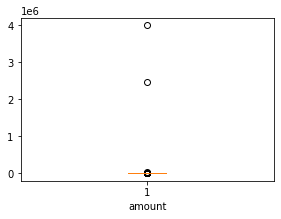

In [65]:
# Visualizing Outliers in Campaign Dataset

gift['amount'].value_counts(dropna=False).sort_index(ascending = True)

fig2 = pyplot.figure(figsize=(10,3))
ax1 = fig2.add_subplot(1,2,1)

ax1.boxplot(gift['amount'])
ax1.set_xlabel('amount')

In [66]:
gift_test = gift.sort_values('amount')

In [67]:
gift_test.tail()

,donorID,campaignID,amount,date,Number_Of_Donation,Donation_Per_Year,gift_year,gift_month,gift_day
21410,102552,3785.0,5000.00,2014-05-03,9,1.285714,2014,5,3
182959,130966,1377.0,12394.68,2007-04-21,1,1.000000,2007,4,21
150654,122679,2417.0,30000.00,2010-07-04,4,2.000000,2010,7,4
141895,120861,1917.0,2479000.00,2008-11-17,1,1.000000,2008,11,17
153012,123168,2390.0,4000000.00,2010-04-26,2,2.000000,2010,4,26


In [68]:
gift_test[gift_test['donorID'] == 123168]

,donorID,campaignID,amount,date,Number_Of_Donation,Donation_Per_Year,gift_year,gift_month,gift_day
153013,123168,2417.0,30.0,2010-07-09,2,2.0,2010,7,9
153012,123168,2390.0,4000000.0,2010-04-26,2,2.0,2010,4,26


In [69]:
gift_test[gift_test['donorID']==120861]

,donorID,campaignID,amount,date,Number_Of_Donation,Donation_Per_Year,gift_year,gift_month,gift_day
141895,120861,1917.0,2479000.0,2008-11-17,1,1.0,2008,11,17


In [70]:
gift.head()

,donorID,campaignID,amount,date,Number_Of_Donation,Donation_Per_Year,gift_year,gift_month,gift_day
138640,120234,153.0,12.39,2004-12-18,7,1.400000,2004,12,18
33318,103593,153.0,12.39,2004-12-19,50,3.846154,2004,12,19
105286,113682,153.0,30.99,2004-12-19,1,1.000000,2004,12,19
11483,101311,153.0,27.52,2004-12-20,42,7.000000,2004,12,20
24670,102789,153.0,7.44,2004-12-20,24,3.000000,2004,12,20


In [71]:
gift = gift.drop([153012, 141895])

##### The above two donors seem to have exceptionally high donation values. Hence, we drop these two values as we have 2 outliers out of over 40K rows!

### The Final Cleaned Tables:

In [72]:
campaign.head(3)

,campaignID,lettersSent,CampaignDate,CostUnitEuro,camp_year,camp_month,camp_day
0,153,6873,2004-12-13,0.17,2004,12,13
1,154,7656,2005-01-01,0.30,2005,1,1
2,180,9933,2005-01-18,0.20,2005,1,18


In [73]:
donor.head(3)

,donorID,Gender_M,Gender_F,Gender_Missing,EN,FR,NL,age,age_6169,Flemish Brabant,...,West Flanders,East Flanders,Liege,Luxembourg,Namur,Hainaut,Limburg,Province_Missing,Number_Of_Donation,Donation_Per_Year
0,100001,1,0,0,0,0,1,53,51,0,...,0,0,0,0,0,0,0,0,12,2.0
1,100002,0,1,0,0,0,1,68,66,1,...,0,0,0,0,0,0,0,0,1,1.0
2,100003,0,1,0,0,0,1,34,32,0,...,0,0,0,0,0,0,0,0,12,4.0


In [74]:
gift.head(3)

,donorID,campaignID,amount,date,Number_Of_Donation,Donation_Per_Year,gift_year,gift_month,gift_day
138640,120234,153.0,12.39,2004-12-18,7,1.400000,2004,12,18
33318,103593,153.0,12.39,2004-12-19,50,3.846154,2004,12,19
105286,113682,153.0,30.99,2004-12-19,1,1.000000,2004,12,19


### Data Exploration for training with `campaignID = 6169`

In [75]:
campaign[campaign['campaignID']==6169]

,campaignID,lettersSent,CampaignDate,CostUnitEuro,camp_year,camp_month,camp_day
335,6169,34888,2018-04-09,0.87,2018,4,9


#### All donations made for the 6169 campaign (train)

In [76]:
# Subsetting the gift dataset for campaignID = 6169
train_gift = gift[gift['campaignID']==6169]
train_gift.info()
train_gift['donorID'].nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1213 entries, 14870 to 210325
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   donorID             1213 non-null   int64         
 1   campaignID          1213 non-null   float64       
 2   amount              1213 non-null   float64       
 3   date                1213 non-null   datetime64[ns]
 4   Number_Of_Donation  1213 non-null   int64         
 5   Donation_Per_Year   1213 non-null   float64       
 6   gift_year           1213 non-null   int64         
 7   gift_month          1213 non-null   int64         
 8   gift_day            1213 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 94.8 KB


1210

##### All donations made during campaign 6169 are stored in the above `train_gift` table

#### We could have donors who have gifted but are not listed in the donors table

In [77]:
# Mapping all the donations/gifts from train_gift to the list of donors
train_gift_donor = pd.merge(train_gift, donor, how='inner', on='donorID')
train_gift_donor.info()
train_gift_donor['donorID'].nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1199 entries, 0 to 1198
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   donorID               1199 non-null   int64         
 1   campaignID            1199 non-null   float64       
 2   amount                1199 non-null   float64       
 3   date                  1199 non-null   datetime64[ns]
 4   Number_Of_Donation_x  1199 non-null   int64         
 5   Donation_Per_Year_x   1199 non-null   float64       
 6   gift_year             1199 non-null   int64         
 7   gift_month            1199 non-null   int64         
 8   gift_day              1199 non-null   int64         
 9   Gender_M              1199 non-null   uint8         
 10  Gender_F              1199 non-null   uint8         
 11  Gender_Missing        1199 non-null   uint8         
 12  EN                    1199 non-null   uint8         
 13  FR                

1196

##### We indeed confirm that there are 14 donors (1210 - 1196) who have gifted but are not listed in the donors table

In [78]:
# The list of 14 donors who donated but do not exist in the donors list
print(set(train_gift.donorID) - set(train_gift_donor.donorID))

{253280, 255488, 317880, 1474536, 205354, 281770, 265584, 225460, 202036, 263382, 212406, 231512, 480980, 210268}


In [79]:
train_gift_donor.head(3)

,donorID,campaignID,amount,date,Number_Of_Donation_x,Donation_Per_Year_x,gift_year,gift_month,gift_day,Gender_M,...,West Flanders,East Flanders,Liege,Luxembourg,Namur,Hainaut,Limburg,Province_Missing,Number_Of_Donation_y,Donation_Per_Year_y
0,101696,6169.0,120.0,2018-09-06,8,1.333333,2018,9,6,1,...,0,0,0,0,0,0,0,0,8,1.333333
1,102052,6169.0,60.0,2018-09-06,3,1.000000,2018,9,6,0,...,0,0,1,0,0,0,0,0,3,1.000000
2,102301,6169.0,120.0,2018-09-06,4,1.000000,2018,9,6,0,...,0,1,0,0,0,0,0,0,4,1.000000


In [80]:
# Create an array of the unique donors who donated for 6169 campaign
train_donor_list = list(set(train_gift_donor['donorID']))

In [81]:
# Add target column, 0 for all non-responders and 1 for all responders
donor["target_train"] = 0
donor.loc[donor["donorID"].isin(train_donor_list), "target_train"] = 1
donor["target_train"].value_counts()

0    43490
1     1196
Name: target_train, dtype: int64

### Generating Training Data Set by mapping the `train_set`

In [82]:
Final_trainset = donor[donor.donorID.isin(train_set.donorID)]
Final_trainset.target_train.value_counts()
# Final_trainset.drop('target_test', axis=1, inplace=True)
Final_trainset.head(2)

,donorID,Gender_M,Gender_F,Gender_Missing,EN,FR,NL,age,age_6169,Flemish Brabant,...,East Flanders,Liege,Luxembourg,Namur,Hainaut,Limburg,Province_Missing,Number_Of_Donation,Donation_Per_Year,target_train
0,100001,1,0,0,0,0,1,53,51,0,...,0,0,0,0,0,0,0,12,2.0,0
1,100002,0,1,0,0,0,1,68,66,1,...,0,0,0,0,0,0,0,1,1.0,0


### Generating Test Data Set by mapping the `test_set`

In [83]:
Final_testset = donor[donor.donorID.isin(test_set.donorID)]

Final_testset.head(2)

,donorID,Gender_M,Gender_F,Gender_Missing,EN,FR,NL,age,age_6169,Flemish Brabant,...,East Flanders,Liege,Luxembourg,Namur,Hainaut,Limburg,Province_Missing,Number_Of_Donation,Donation_Per_Year,target_train
0,100001,1,0,0,0,0,1,53,51,0,...,0,0,0,0,0,0,0,12,2.0,0
2,100003,0,1,0,0,0,1,34,32,0,...,0,0,0,0,0,0,0,12,4.0,0


# Model Building

#### Following Algorithms have been used for the Analysis - 
* Decision Tree
* Logistic Regression
* Random Forest
* Gradient Boosting 
* Support Vector Machine
* Neural Network
* Nearest Neighbors

In [84]:
# Importing required libraries
from sklearn.linear_model   import LogisticRegression
from sklearn.tree           import DecisionTreeClassifier
from sklearn.ensemble       import RandomForestClassifier
from sklearn.ensemble       import GradientBoostingClassifier
from sklearn.svm            import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors      import KNeighborsClassifier

### Feature Correlation Analysis

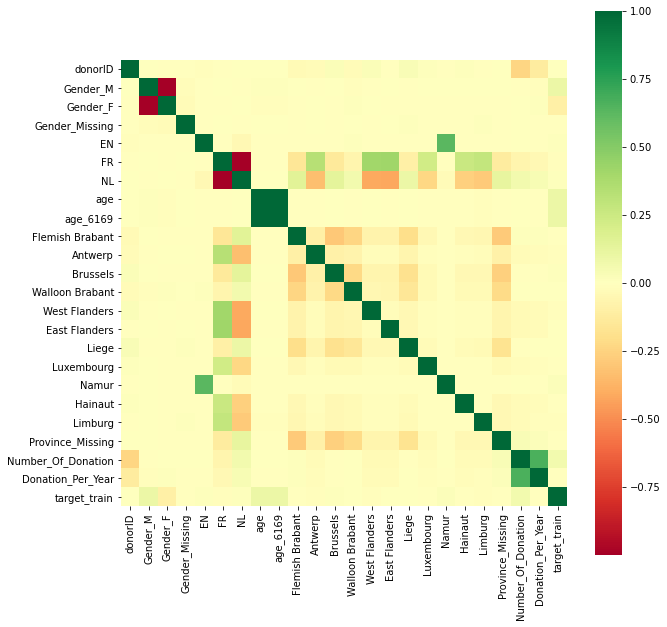

In [85]:
#Examining variable correlation through a heatmap (CAN RUN ONLY ONCE OUR MERGED SETS ARE READY)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(Final_trainset[Final_trainset.columns[~Final_trainset.columns.isin(['y'])]].corr(),square=True,cmap='RdYlGn',ax=ax)

### Selecting the Features

Used two different features set as `age_6169` and `age_7244` are w.r.t the train & test sets

In [86]:
features_train = ["Gender_M", "Gender_F", "EN", "FR", "age_6169", "Number_Of_Donation", "Donation_Per_Year", "Flemish Brabant", "Antwerp", "Brussels", 
            "Walloon Brabant","West Flanders", "East Flanders", "Liege", "Luxembourg", "Namur","Hainaut", "Limburg"]
features_test  =  ["Gender_M", "Gender_F", "EN", "FR", "age", "Number_Of_Donation", "Donation_Per_Year", "Flemish Brabant", "Antwerp", "Brussels", 
            "Walloon Brabant","West Flanders", "East Flanders", "Liege", "Luxembourg", "Namur","Hainaut", "Limburg"]
target_train   = ["target_train"]
# target_test    = ["target_test"]

In [87]:
donor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44686 entries, 0 to 44685
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   donorID             44686 non-null  int64  
 1   Gender_M            44686 non-null  uint8  
 2   Gender_F            44686 non-null  uint8  
 3   Gender_Missing      44686 non-null  uint8  
 4   EN                  44686 non-null  uint8  
 5   FR                  44686 non-null  uint8  
 6   NL                  44686 non-null  uint8  
 7   age                 44686 non-null  int64  
 8   age_6169            44686 non-null  int64  
 9   Flemish Brabant     44686 non-null  uint8  
 10  Antwerp             44686 non-null  uint8  
 11  Brussels            44686 non-null  uint8  
 12  Walloon Brabant     44686 non-null  uint8  
 13  West Flanders       44686 non-null  uint8  
 14  East Flanders       44686 non-null  uint8  
 15  Liege               44686 non-null  uint8  
 16  Luxe

### Defining Training & Test Sets

In [88]:
TrainingSet = Final_trainset
TestSet = Final_testset

### Model Training

In [89]:
# Instanciating the Models

tree         = DecisionTreeClassifier()
logistic     = LogisticRegression(solver = "lbfgs", max_iter = 500)
randomForest = RandomForestClassifier(n_estimators = 100)
boostedTree  = GradientBoostingClassifier()
svm          = SVC(gamma = "scale", probability = True)
neuralNet    = MLPClassifier()
neighbors    = KNeighborsClassifier()

In [90]:
models = {"tree"         :tree,
          "logistic"     :logistic,
          "randomForest" :randomForest,
          "boostedTree"  :boostedTree,
          "svm"          :svm,
          "neuralNet"    :neuralNet,
          "neighbors"    :neighbors
         } 

In [91]:
for model in models:
    models[model].fit(TrainingSet[features_train],TrainingSet[target_train])
    print(f"{model} has been trained successfully")

tree has been trained successfully
logistic has been trained successfully
randomForest has been trained successfully
boostedTree has been trained successfully
svm has been trained successfully
neuralNet has been trained successfully
neighbors has been trained successfully


## Model Performance & Evaluation (Using Accuracy Score, Confusion Martix and AUC)

In [92]:
from sklearn.metrics        import accuracy_score
from sklearn.metrics        import auc
from sklearn.metrics        import roc_auc_score
from sklearn.metrics        import roc_curve
from sklearn.metrics        import confusion_matrix

In [93]:
from ieseg                  import partition
from ieseg                  import roc
from ieseg                  import lift
from ieseg                  import cumulativeResponse
from ieseg                  import cumulativeGains

#### Performance of the Train Dataset

In [94]:
performances_train = {}

for model in models:
    predictions   = models[model].predict(TrainingSet[features_train])
    probabilities = DataFrame(models[model].predict_proba(TrainingSet[features_train]))[1]
    accuracy      = accuracy_score(TrainingSet[target_train],predictions)
    auc           = roc_auc_score(array(TrainingSet[target_train]),array(probabilities))
    
    performances_train[model] = {"Accuracy":accuracy,"AUC":auc,"Probabilities":probabilities}

In [95]:
# Confusion Matrix for Training Set

CM_Train = confusion_matrix(Final_trainset['target_train'], predictions)
CM_Train

array([[33624,    52],
       [ 1088,   105]], dtype=int64)

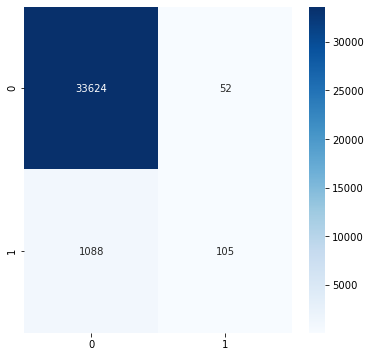

In [96]:
#Visualizing the Confusion Matrix for Training Set

plt.subplots(figsize=(6,6))
sns.heatmap(CM_Train, annot=True, cmap='Blues', fmt='g')
plt.show()

In [97]:
# Performance of Training Set on Model
DataFrame(performances_train)

,tree,logistic,randomForest,boostedTree,svm,neuralNet,neighbors
Accuracy,0.984944,0.965413,0.984915,0.966446,0.965786,0.965815,0.967306
AUC,0.994727,0.759233,0.993577,0.894896,0.750964,0.87463,0.941515
Probabilities,0 0.0 1 0.0 2 0.0 3 ...,0 0.063135 1 0.028209 2 0...,0 0.015 1 0.000 2 0.000 3...,0 0.065150 1 0.000601 2 0...,0 0.035221 1 0.035221 2 0...,0 0.076768 1 0.000083 2 0...,0 0.0 1 0.0 2 0.0 3 ...


#### Performance of the Test DataSet

In [98]:
performances_test = {}

for model in models:
    predictions   = models[model].predict(TestSet[features_test])
    probabilities = DataFrame(models[model].predict_proba(TestSet[features_test]))[1]
#     accuracy      = accuracy_score(TestSet[target_test],predictions)
#     auc           = roc_auc_score(array(TestSet[target_test]),array(probabilities))
    
    performances_test[model] = {"Probabilities":probabilities}

In [99]:
# Performance of Testing Set on our Model
DataFrame(performances_test)

,tree,logistic,randomForest,boostedTree,svm,neuralNet,neighbors
Probabilities,0 0.0 1 0.0 2 0.0 3 ...,0 0.066651 1 0.001046 2 0...,0 0.005 1 0.000 2 0.000 3...,0 0.073014 1 0.008480 2 0...,0 0.035221 1 0.035221 2 0...,0 0.079931 1 0.001908 2 0...,0 0.0 1 0.0 2 0.0 3 ...


In [100]:
probabilities

0        0.0
1        0.0
2        0.0
3        0.0
4        0.2
        ... 
26514    0.0
26515    0.0
26516    0.0
26517    0.0
26518    0.0
Name: 1, Length: 26519, dtype: float64

In [101]:
neuralNet    = MLPClassifier()

In [102]:
models = {"neuralNet"    :neuralNet} 

In [103]:

for model in models:
    models[model].fit(TrainingSet[features_train],TrainingSet[target_train])
    print(f"{model} has been trained successfully")

neuralNet has been trained successfully


In [104]:
performances_test = {}

for model in models:
    predictions   = models[model].predict(TestSet[features_test])
    probabilities = DataFrame(models[model].predict_proba(TestSet[features_test]))[1]
#     accuracy      = accuracy_score(TestSet[target_test],predictions)
#     auc           = roc_auc_score(array(TestSet[target_test]),array(probabilities))
    
    performances_test[model] = {"Probabilities":probabilities}

In [105]:
TestSet

,donorID,Gender_M,Gender_F,Gender_Missing,EN,FR,NL,age,age_6169,Flemish Brabant,...,East Flanders,Liege,Luxembourg,Namur,Hainaut,Limburg,Province_Missing,Number_Of_Donation,Donation_Per_Year,target_train
0,100001,1,0,0,0,0,1,53,51,0,...,0,0,0,0,0,0,0,12,2.000000,0
2,100003,0,1,0,0,0,1,34,32,0,...,0,0,0,0,0,0,0,12,4.000000,0
3,100004,1,0,0,0,1,0,68,66,0,...,0,0,0,0,0,0,0,26,3.714286,0
5,100006,0,1,0,0,1,0,94,92,0,...,0,0,0,0,0,0,0,1,1.000000,0
8,100009,0,1,0,0,1,0,88,86,0,...,0,0,0,0,0,0,0,19,2.714286,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44681,144687,0,1,0,0,1,0,50,48,0,...,1,0,0,0,0,0,0,1,1.000000,0
44682,144688,0,1,0,0,0,1,48,46,0,...,0,1,0,0,0,0,0,7,2.333333,0
44683,144689,0,1,0,0,0,1,53,51,0,...,0,0,0,0,0,0,0,4,1.333333,0
44684,144690,0,1,0,0,1,0,44,42,0,...,0,0,0,0,0,0,0,1,1.000000,0


In [106]:
probabilities

0        0.093038
1        0.001971
2        0.025645
3        0.000094
4        0.038569
           ...   
26514    0.000149
26515    0.013515
26516    0.048100
26517    0.000046
26518    0.000042
Name: 1, Length: 26519, dtype: float64

In [107]:
TestSet1=TestSet['donorID'].tolist()
TestSet1 = DataFrame (TestSet1,columns=['donorID'])
TestSet1['Probability']=probabilities
TestSet1

,donorID,Probability
0,100001,0.093038
1,100003,0.001971
2,100004,0.025645
3,100006,0.000094
4,100009,0.038569
...,...,...
26514,144687,0.000149
26515,144688,0.013515
26516,144689,0.048100
26517,144690,0.000046


In [108]:
TestSet1.to_csv(r'Campaign7662Result.csv', index = False)